### E-Commerce Sentiment Analysis

### Importing the required dependencies

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### EDA

In [3]:
#Loading the data
data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [4]:
data.head(50)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1


In [5]:
#checking the number of available columns in the data
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [6]:
#data['verified_reviews'] = data['verified_reviews'].fillna('').astype(str)
data.dropna(inplace=True)

In [7]:
#adding a 'length' column wi=hich will contain the length of strings of the 'verified reviews'
data['length'] = data['verified_reviews'].apply(len)

In [8]:
data.head(50)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1,367
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
9,5,30-Jul-18,Heather Gray Fabric,"""Love it! I’ve listened to songs I haven’t hea...",1,116


In [9]:
#checking the datatypes of the columns
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

### Analyzing Columns

In [10]:
#analysing the rating column
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


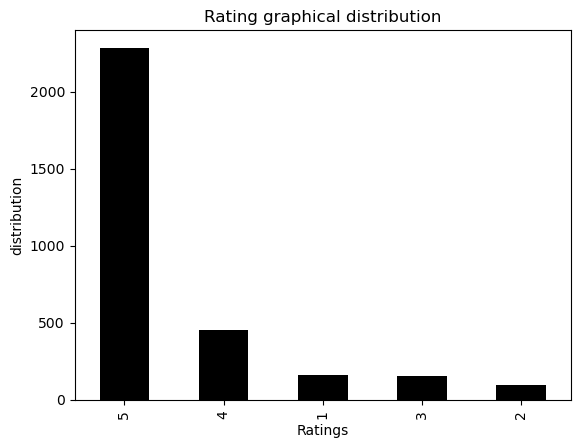

In [11]:
#graphical representation of the values above

data['rating'].value_counts().plot.bar(color = 'black')
plt.title('Rating graphical distribution')
plt.xlabel('Ratings')
plt.ylabel('distribution')
plt.show()

In [12]:
#percetage distribution the rating count
print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


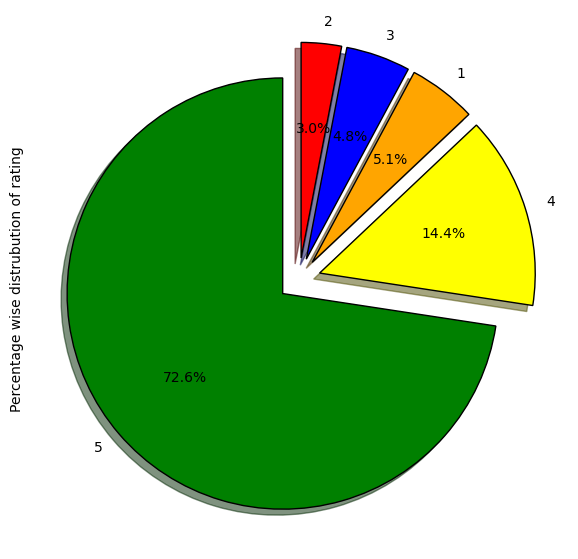

In [13]:
#percentage pie chat distribution of the same results
fig = plt.figure(figsize=(7,7))

colors = ('green', 'yellow', 'orange','blue','red')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [14]:
#analysing the feedback column
print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [15]:
#getting the meaning of 0 and 1 meanings
#when the feedback is 0
review_0 = data[data['feedback'] == 0].iloc[60]['verified_reviews']
print(review_0)

Sent it back due to crackling noise and turning itself off and on - but what can you expect with a refurbished item?


In [16]:
#when the feedback is 1
review_1 = data[data['feedback'] == 1].iloc[5]['verified_reviews']
print(review_1)

"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do."


### The above two examples shows that, when a feedback is 1, its a positive review and feedback 0 is a negative review 

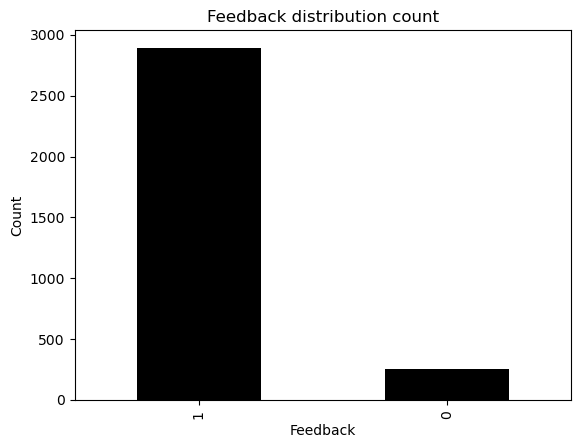

In [17]:
#bar chat representation
data['feedback'].value_counts().plot.bar(color = 'black')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [18]:
#getting the percentage distribution of positive and negative feedback
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


### the above percentage shows that, 91% of the feedback is negative and 8.16% is negative

<Axes: ylabel='Percentage wise distrubution of feedback'>

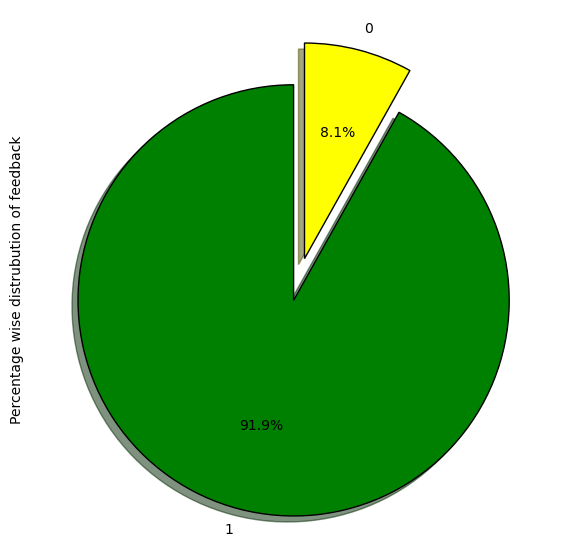

In [19]:
#pie chat representation
figure = plt.figure(figsize=(7,7))

Background_colors = ('yellow', 'blue')

fd= {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

### Feedback ratings of positive and negative feedbacks

In [20]:
#when the feedback is 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [21]:
#when the feedback ratings is 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [22]:
#The variations column, that is the different variations of the alexa product
print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


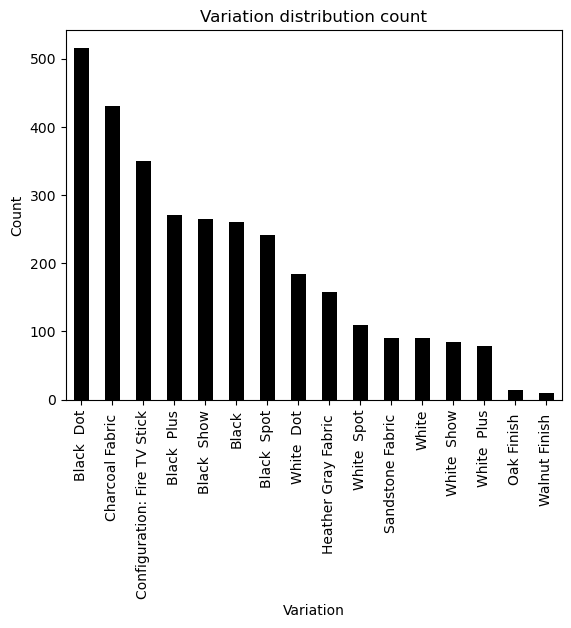

In [23]:
#bargraph representation
data['variation'].value_counts().plot.bar(color = 'black')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [24]:
#percentage distribution
print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [25]:
#mean of the variation rating
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

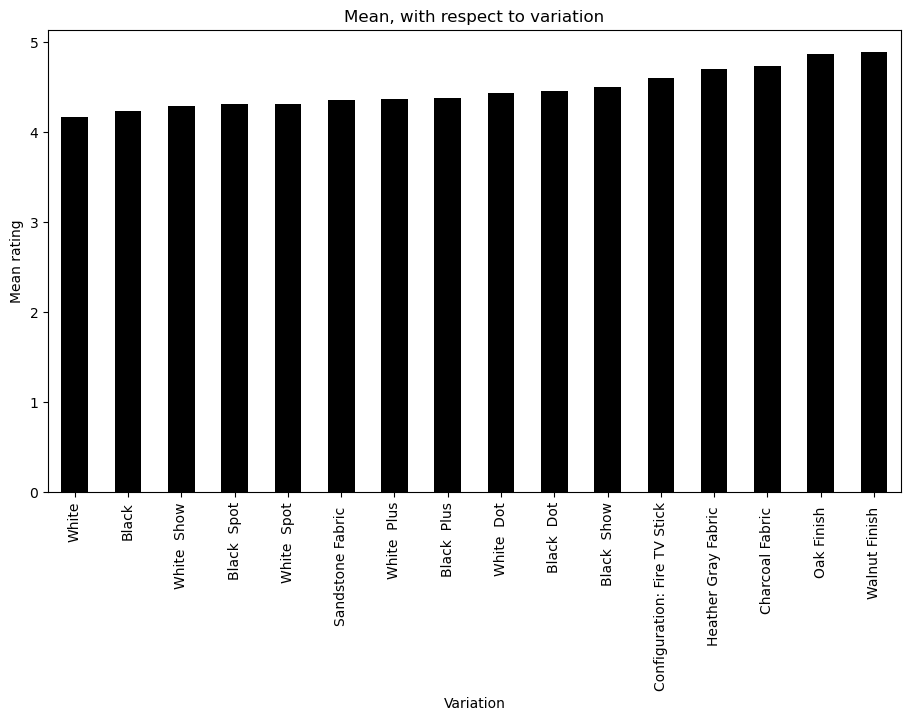

In [26]:
#bar chart representation
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'black', figsize=(11, 6))
plt.title("Mean, with respect to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

### From the above graph, the 'Walnut Finish' variation seems to have the highest mean rating

### length analysis when the feedback is 0

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

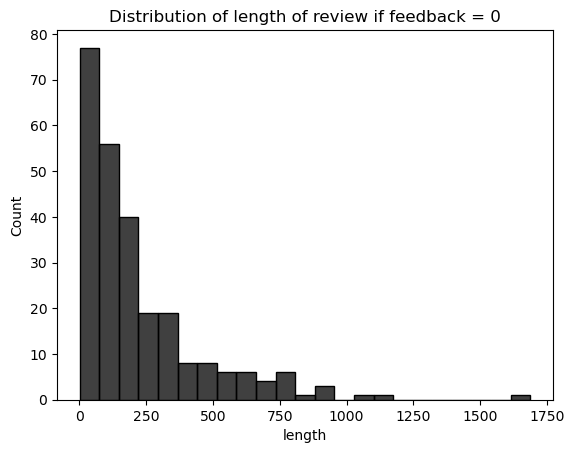

In [27]:
sns.histplot(data[data['feedback']==0]['length'],color='black').set(title='Distribution of length of review if feedback = 0')

### Length analysis when the feedback is 1

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

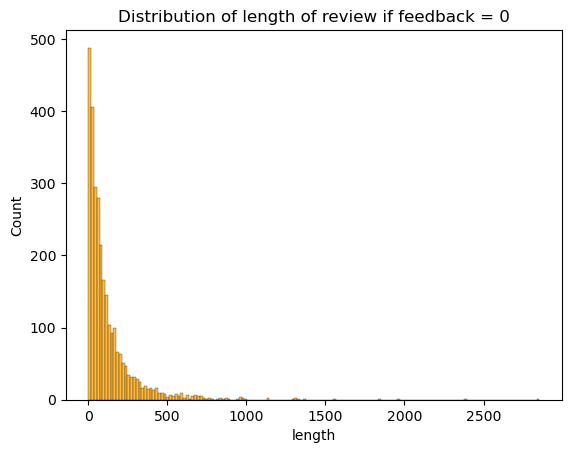

In [28]:
sns.histplot(data[data['feedback']==1]['length'],color='orange').set(title='Distribution of length of review if feedback = 0')

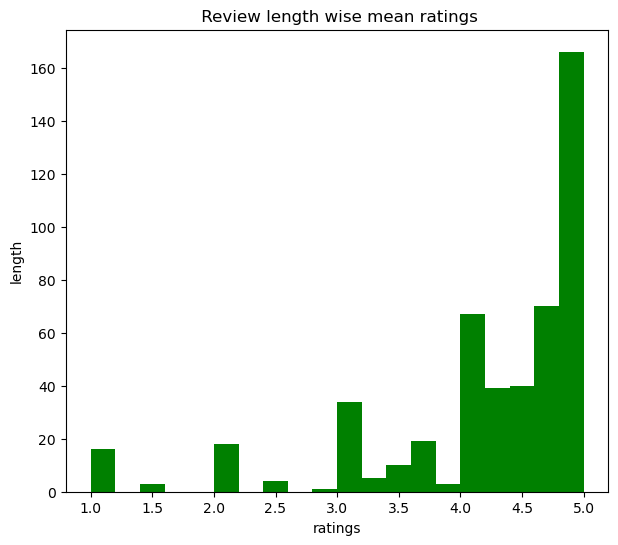

In [29]:
#lengthwise mean rating
data.groupby('length')['rating'].mean().plot.hist(color = 'green', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

### Binary representation with convectorizer

In [30]:
countVet = CountVectorizer(stop_words='english')
words = countVet.fit_transform(data.verified_reviews)

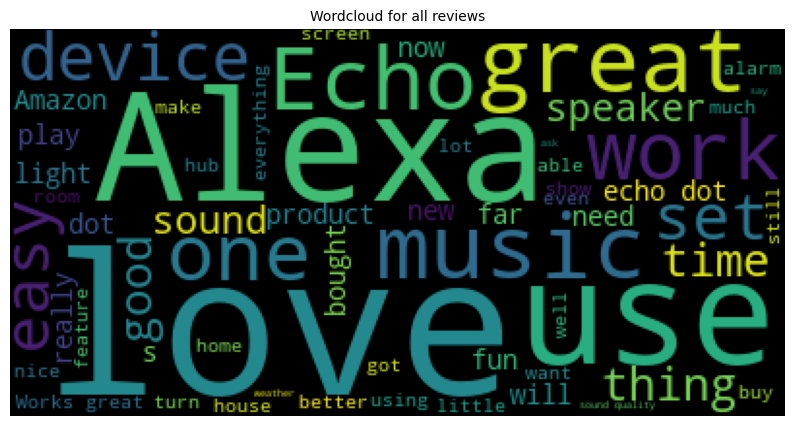

In [31]:
#join all reviews
reviews = " ".join([review for review in data['verified_reviews']])
                        
# wordcloud object
wordCloud = WordCloud(background_color='black', max_words=60)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wordCloud.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [37]:
# Combine all reviews for each feedback category and splitting them into individual words
negative_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
negative_reviews = negative_reviews.lower().split()

positive_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
positive_reviews = positive_reviews.lower().split()

In [38]:
#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in negative_reviews if x not in positive_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in positive_reviews if x not in negative_reviews]
unique_positive = " ".join(unique_positive)

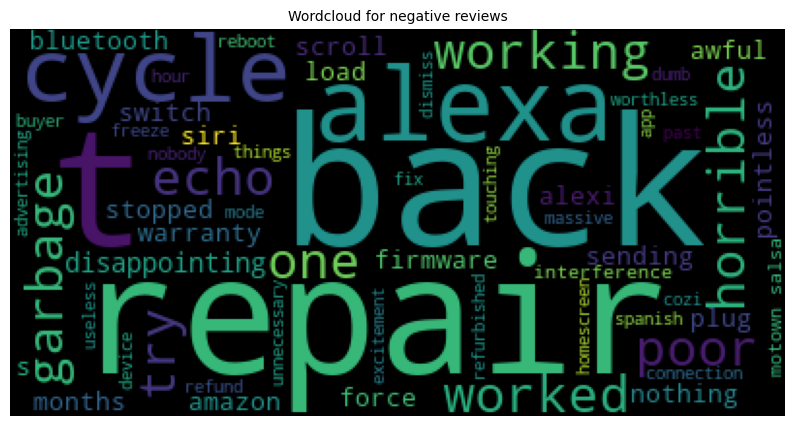

In [39]:
#wordcloud for negative feedbacks
neg_wc = WordCloud(background_color='black', max_words=60)
plt.figure(figsize=(10,10))
plt.imshow(neg_wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

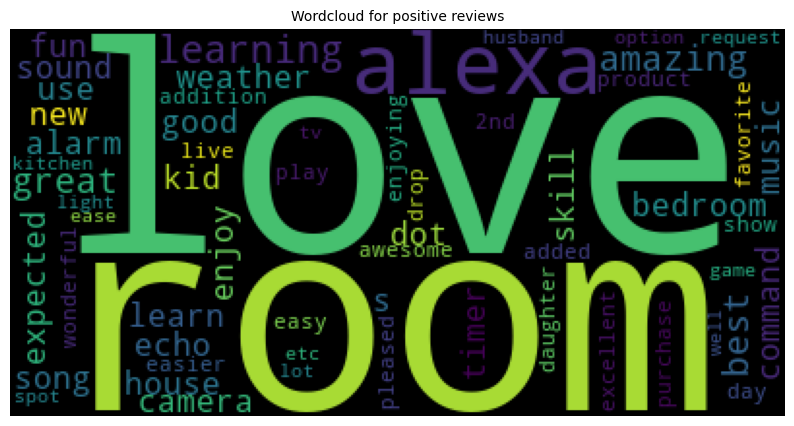

In [40]:
#wordcloud for positive reviews
pos_wc = WordCloud(background_color='black', max_words=60)
plt.figure(figsize=(10,10))
plt.imshow(pos_wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

### Data Preproccesing and Modelling with corpus and PorterStemmer

In [41]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [42]:
#creating bag of words with convectorizer
cv = CountVectorizer(max_features = 2500)

#independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [43]:
#saving the convectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [44]:
#shape of x and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


### splitting the dataset into train and test data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 30)
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (1574, 2500)
y train: (1574,)
X test: (1575, 2500)
y test: (1575,)


In [46]:
#scaling x_test and x_train and values to be between 0 and 1
scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [47]:
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

### Modelling, Random Forest

In [96]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scale, y_train)

RandomForestClassifier()

In [51]:
#accuracy
print("Training Accuracy :", model_rf.score(X_train_scale, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scale, y_test))

Training Accuracy : 0.9955527318932655
Testing Accuracy : 0.926984126984127


In [52]:
#predicting
y_preds = model_rf.predict(X_test_scale)

In [53]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

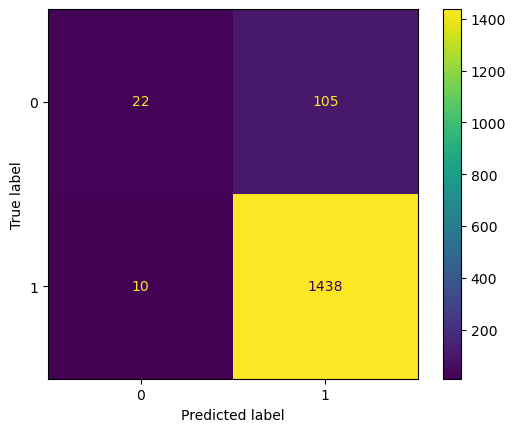

In [54]:
#Confusion Matrix display

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_,)
cm_display.plot()
plt.show()

In [56]:
#accuracy scores
accuracies = cross_val_score(estimator = model_rf, X = X_train_scale, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.935197129726679
Standard Variance : 0.009748192692680426


### Grid Search to obtain optimal values on Random Forest model

In [57]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scale, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [58]:
#getting the best parameters from the grid search
print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 100}


In [59]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.68043202033036
Cross validation mean accuracy on test set : 92.28081321473951
Accuracy score for test set : 0.926984126984127


### Modelling with XgBoost

In [60]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scale, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
#Accuracy score
 
print("Training Accuracy :", model_xgb.score(X_train_scale, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scale, y_test))

Training Accuracy : 0.9752223634053367
Testing Accuracy : 0.9282539682539682


In [62]:
y_preds = model_xgb.predict(X_test)

In [63]:
y_preds

array([1, 1, 0, ..., 1, 1, 1])

In [64]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[  37   90]
 [  21 1427]]


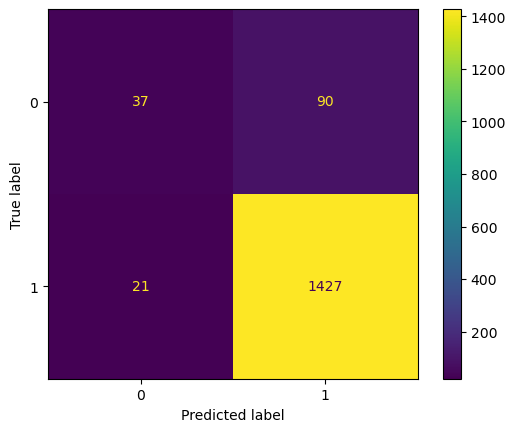

In [65]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

### Modelling with Decision tree classifier

In [66]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train_scale, y_train)

DecisionTreeClassifier()

In [67]:
#Accuracy
 
print("Training Accuracy :", model_dtc.score(X_train_scale, y_train))
print("Testing Accuracy :", model_dtc.score(X_test_scale, y_test))

Training Accuracy : 0.9955527318932655
Testing Accuracy : 0.9079365079365079


In [68]:
y_preds = model_dtc.predict(X_test)

In [69]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[  63   64]
 [ 185 1263]]


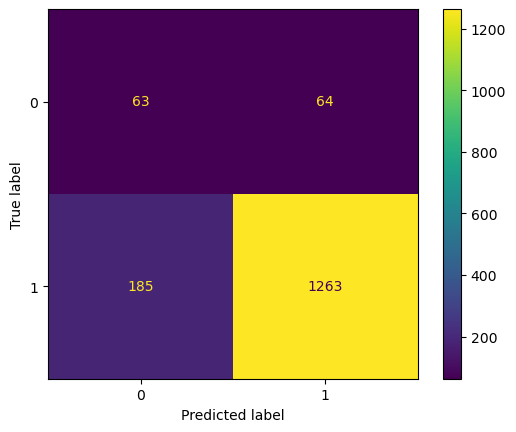

In [70]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dtc.classes_)
cm_display.plot()
plt.show()